# Import packages:
Package is a set of functions that give you the result of a function without requiring you what the function is.

In [1]:
import netCDF4 as nc #netCDF4 is the package for importing .nc files from LAADS portal
import numpy as np #numpy is the package to do the operation (sum, minus, extract components of an array)
import matplotlib.pyplot as plt #matplotlib.pyplot is the package for plotting

# Use netCDF4 to import .nc file:

In [2]:
ds = nc.Dataset("AERDB_D3_VIIRS_SNPP.A2021070.001.2021074001533.nc")

In [7]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: VIIRS Deep Blue Level 3 daily aerosol data, 1x1 degree grid
    comment: Data are the arithmetic mean of all VIIRS Deep Blue/SOAR L2 data located in each grid element after filtering by confidence flag. Source are the best_estimate SDS in L2 files.
    references: https://deepblue.gsfc.nasa.gov
    institution: NASA Goddard Space Flight Center
    long_name: VIIRS Deep Blue Level 3 daily aerosol data, 1x1 degree grid
    production_datetime: 2021-03-15T00:15:33Z
    geospatial_lat_max: 90.0
    geospatial_lat_min: -90.0
    geospatial_lon_min: 180.0
    geospatial_lon_max: -180.0
    NorthBoundingCoordinate: 90.0
    SouthBoundingCoordinate: -90.0
    EastBoundingCoordinate: 180.0
    WestBoundingCoordinate: -180.0
    latitude_resolution: 1.0
    longitude_resolution: 1.0
    related_url: https://deepblue.gsfc.nasa.gov
    keywords: EARTH SCIENCE > ATMOSPHERE > AEROSOLS > AEROSOL OPT

In [4]:
#A preview of variables (measurements) in a LAADS dataset at a given date:
list(ds.variables)

['Aerosol_Optical_Thickness_550_Land_Count',
 'Aerosol_Optical_Thickness_550_Land_Maximum',
 'Aerosol_Optical_Thickness_550_Land_Mean',
 'Aerosol_Optical_Thickness_550_Land_Minimum',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Count',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Maximum',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Mean',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Minimum',
 'Aerosol_Optical_Thickness_550_Land_Ocean_Standard_Deviation',
 'Aerosol_Optical_Thickness_550_Land_Standard_Deviation',
 'Aerosol_Optical_Thickness_550_Ocean_Count',
 'Aerosol_Optical_Thickness_550_Ocean_Maximum',
 'Aerosol_Optical_Thickness_550_Ocean_Mean',
 'Aerosol_Optical_Thickness_550_Ocean_Minimum',
 'Aerosol_Optical_Thickness_550_Ocean_Standard_Deviation',
 'Aerosol_Type_Land_Ocean_Histogram',
 'Aerosol_Type_Land_Ocean_Mode',
 'Aerosol_Types',
 'Angstrom_Exponent_Land_Maximum',
 'Angstrom_Exponent_Land_Mean',
 'Angstrom_Exponent_Land_Minimum',
 'Angstrom_Exponent_Land_Ocean_Maximum',
 'Angstrom

In [7]:
ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean']

<class 'netCDF4._netCDF4.Variable'>
float32 Aerosol_Optical_Thickness_550_Land_Ocean_Mean(Latitude_1D, Longitude_1D)
    units: 1
    coordinates: Longitude Latitude
    long_name: aerosol optical thickness estimated at 550 nm over land and ocean
    _FillValue: -999.0
    valid_range: [ 0. 10.]
unlimited dimensions: 
current shape = (180, 360)
filling on

# Access measurement of interest:
For example, if you're interested in 'Aerosol_Optical_Thickness_550_Land_Ocean_Mean':

In [5]:
aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'])
aerosol[aerosol<0] = np.nan #exclude invalid values

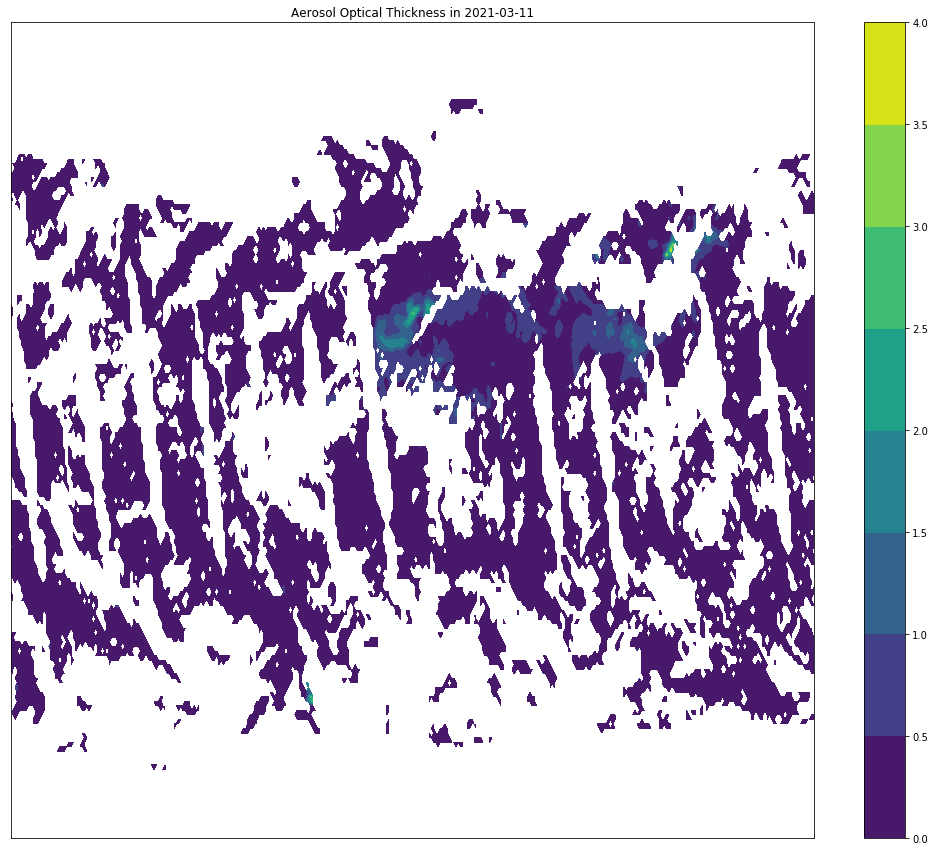

In [10]:
#This step is just for workshop demonstration, not essential for LBA requirement
#Visualize global 'Aerosol_Optical_Thickness_550_Land_Ocean_Mean'

plt.figure(figsize=(18,15))
plt.contourf(aerosol)
plt.colorbar()
plt.title(f"Aerosol Optical Thickness in {ds.time_coverage_start[:10]}")
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
#This is just to see how latitudes and longitudes are organized in a LAADS dataset:
print(np.array(ds.variables['Latitude']))

[[-89.5 -89.5 -89.5 ... -89.5 -89.5 -89.5]
 [-88.5 -88.5 -88.5 ... -88.5 -88.5 -88.5]
 [-87.5 -87.5 -87.5 ... -87.5 -87.5 -87.5]
 ...
 [ 87.5  87.5  87.5 ...  87.5  87.5  87.5]
 [ 88.5  88.5  88.5 ...  88.5  88.5  88.5]
 [ 89.5  89.5  89.5 ...  89.5  89.5  89.5]]


In [7]:
print(np.array(ds.variables['Longitude']))

[[-179.5 -178.5 -177.5 ...  177.5  178.5  179.5]
 [-179.5 -178.5 -177.5 ...  177.5  178.5  179.5]
 [-179.5 -178.5 -177.5 ...  177.5  178.5  179.5]
 ...
 [-179.5 -178.5 -177.5 ...  177.5  178.5  179.5]
 [-179.5 -178.5 -177.5 ...  177.5  178.5  179.5]
 [-179.5 -178.5 -177.5 ...  177.5  178.5  179.5]]


# Search for the value at a particular location/pixel/coordinate:
For example, with San Francisco (37.5N and 122.5W), we can search for latitude of 37.5 and longitude of 122.5

In [8]:
SF_latitude = 37.5
SF_longitude = -122.5
latitude_filter = np.array(ds.variables['Latitude']) == SF_latitude
longitude_filter = np.array(ds.variables['Longitude']) == SF_longitude
latitude_and_longitude_filter = latitude_filter & longitude_filter
SF_aerosol = aerosol[latitude_and_longitude_filter]
print(SF_aerosol)

[nan]


# Record/Save the datetime value:
This step is essential if you want to plot the temporal trend of the measurement of your interest:

In [9]:
#Access the datetime record (in DAAS format, or text format): 
raw_datetime = ds.production_datetime
print(raw_datetime)

#Process the datetime record to a form that can be plotted:
from datetime import datetime
processed_datetime = datetime.strptime(raw_datetime[:10], "%Y-%m-%d")
print(processed_datetime)

2021-03-15T00:15:33Z
2021-03-15 00:00:00


# Full procedure: plot the temporal trend of aerosol thickness in San Franciso: 

In [10]:
list_files = ["AERDB_D3_VIIRS_SNPP.A2021085.001.2021089000330.nc",
             "AERDB_D3_VIIRS_SNPP.A2021001.001.2021005000246.nc",
             "AERDB_D3_VIIRS_SNPP.A2021002.001.2021006001037.nc",
             "AERDB_D3_VIIRS_SNPP.A2021070.001.2021074001533.nc"]

record_datetime = []
record_aerosol_SF = []

for filename in list_files:
    ds = nc.Dataset(filename)
    aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Ocean_Mean'])
    aerosol[aerosol<0] = np.nan #exclude invalid values

    SF_latitude = 37.5
    SF_longitude = -122.5
    latitude_filter = np.array(ds.variables['Latitude']) == SF_latitude
    longitude_filter = np.array(ds.variables['Longitude']) == SF_longitude
    latitude_and_longitude_filter = latitude_filter & longitude_filter
    SF_aerosol = aerosol[latitude_and_longitude_filter][0]

    #Access the datetime record (in DAAS format, or text format): 
    raw_datetime = ds.production_datetime

    #Process the datetime record to a form that can be plotted:
    processed_datetime = datetime.strptime(raw_datetime[:10], "%Y-%m-%d")
    
    record_aerosol_SF.append(SF_aerosol)
    record_datetime.append(processed_datetime)

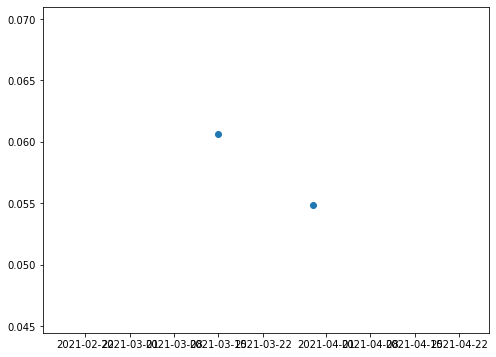

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(record_datetime, record_aerosol_SF)
plt.show()

In [8]:
simplified_aerosol = np.array([[1,2,3,4],
                              [10,20,30,40]])
index_chosen = np.array([[True, True, True, False],
                        [True, True, True, False]])
simplified_aerosol[index_chosen].reshape(2,3)

array([[ 1,  2,  3],
       [10, 20, 30]])

In [13]:
latitude_filter

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

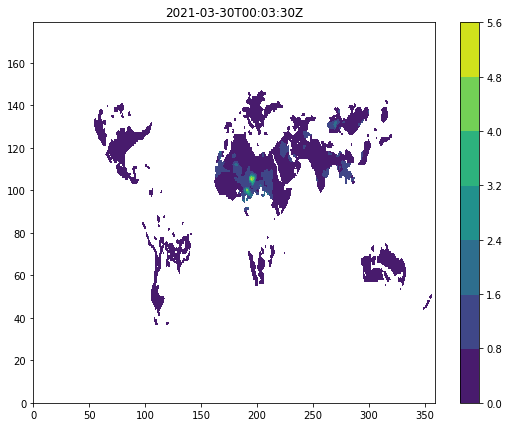

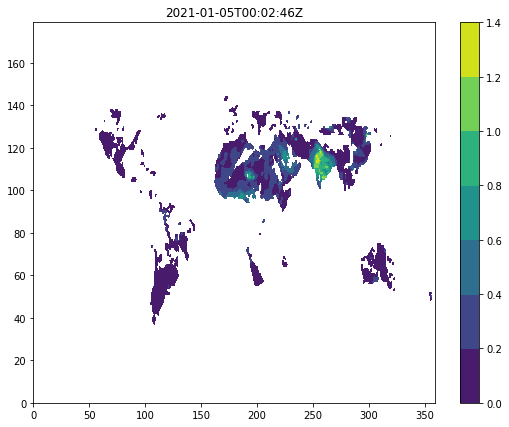

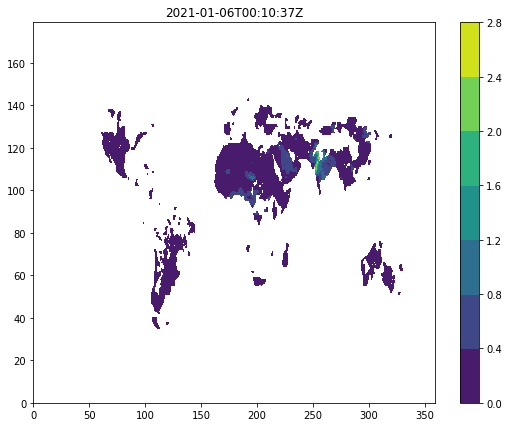

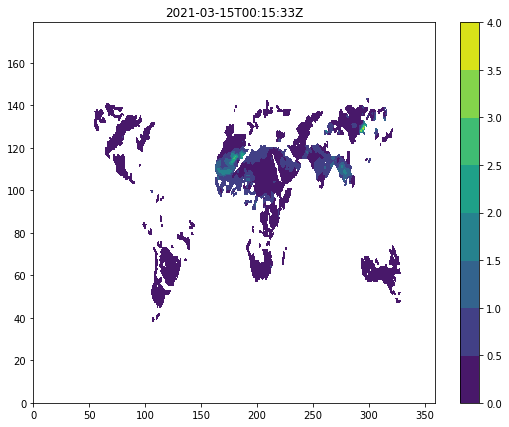

In [3]:
list_files = ["AERDB_D3_VIIRS_SNPP.A2021085.001.2021089000330.nc",
             "AERDB_D3_VIIRS_SNPP.A2021001.001.2021005000246.nc",
             "AERDB_D3_VIIRS_SNPP.A2021002.001.2021006001037.nc",
             "AERDB_D3_VIIRS_SNPP.A2021070.001.2021074001533.nc"]

for filename in list_files: 
    ds = nc.Dataset(filename)
    aerosol = np.array(ds.variables['Aerosol_Optical_Thickness_550_Land_Mean'])
    aerosol[aerosol<0] = np.nan #exclude invalid values
    #latitude_filter = (np.array(ds.variables['Latitude'])>=7.5)&(np.array(ds.variables['Latitude'])<=36.5)
    #longitude_filter = (np.array(ds.variables['Longitude'])>=23.5)&(np.array(ds.variables['Longitude'])<=28.5)
    #latitude_and_longitude_filter = latitude_filter & longitude_filter
    #india_aerosol = aerosol[latitude_and_longitude_filter].reshape(30,6)
    #This step is just for workshop demonstration, not essential for LBA requirement
    #Visualize global 'Aerosol_Optical_Thickness_550_Land_Ocean_Mean'
    plt.figure(figsize=(9,7))
    plt.contourf(aerosol)
    plt.title(ds.production_datetime)
    plt.colorbar()
    plt.show()